In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/data.csv')
data.head()

data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep

In [ ]:
descriptive_stats = data.describe()
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for col in cat_columns:
    unique_values[col] = data[col].unique()

display(descriptive_stats, unique_values)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

In [ ]:

data['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)

data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
data['Diastolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)

data.drop(['Blood Pressure','Person ID'], axis=1, inplace=True)

<ipython-input-4-f32affe881c6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)


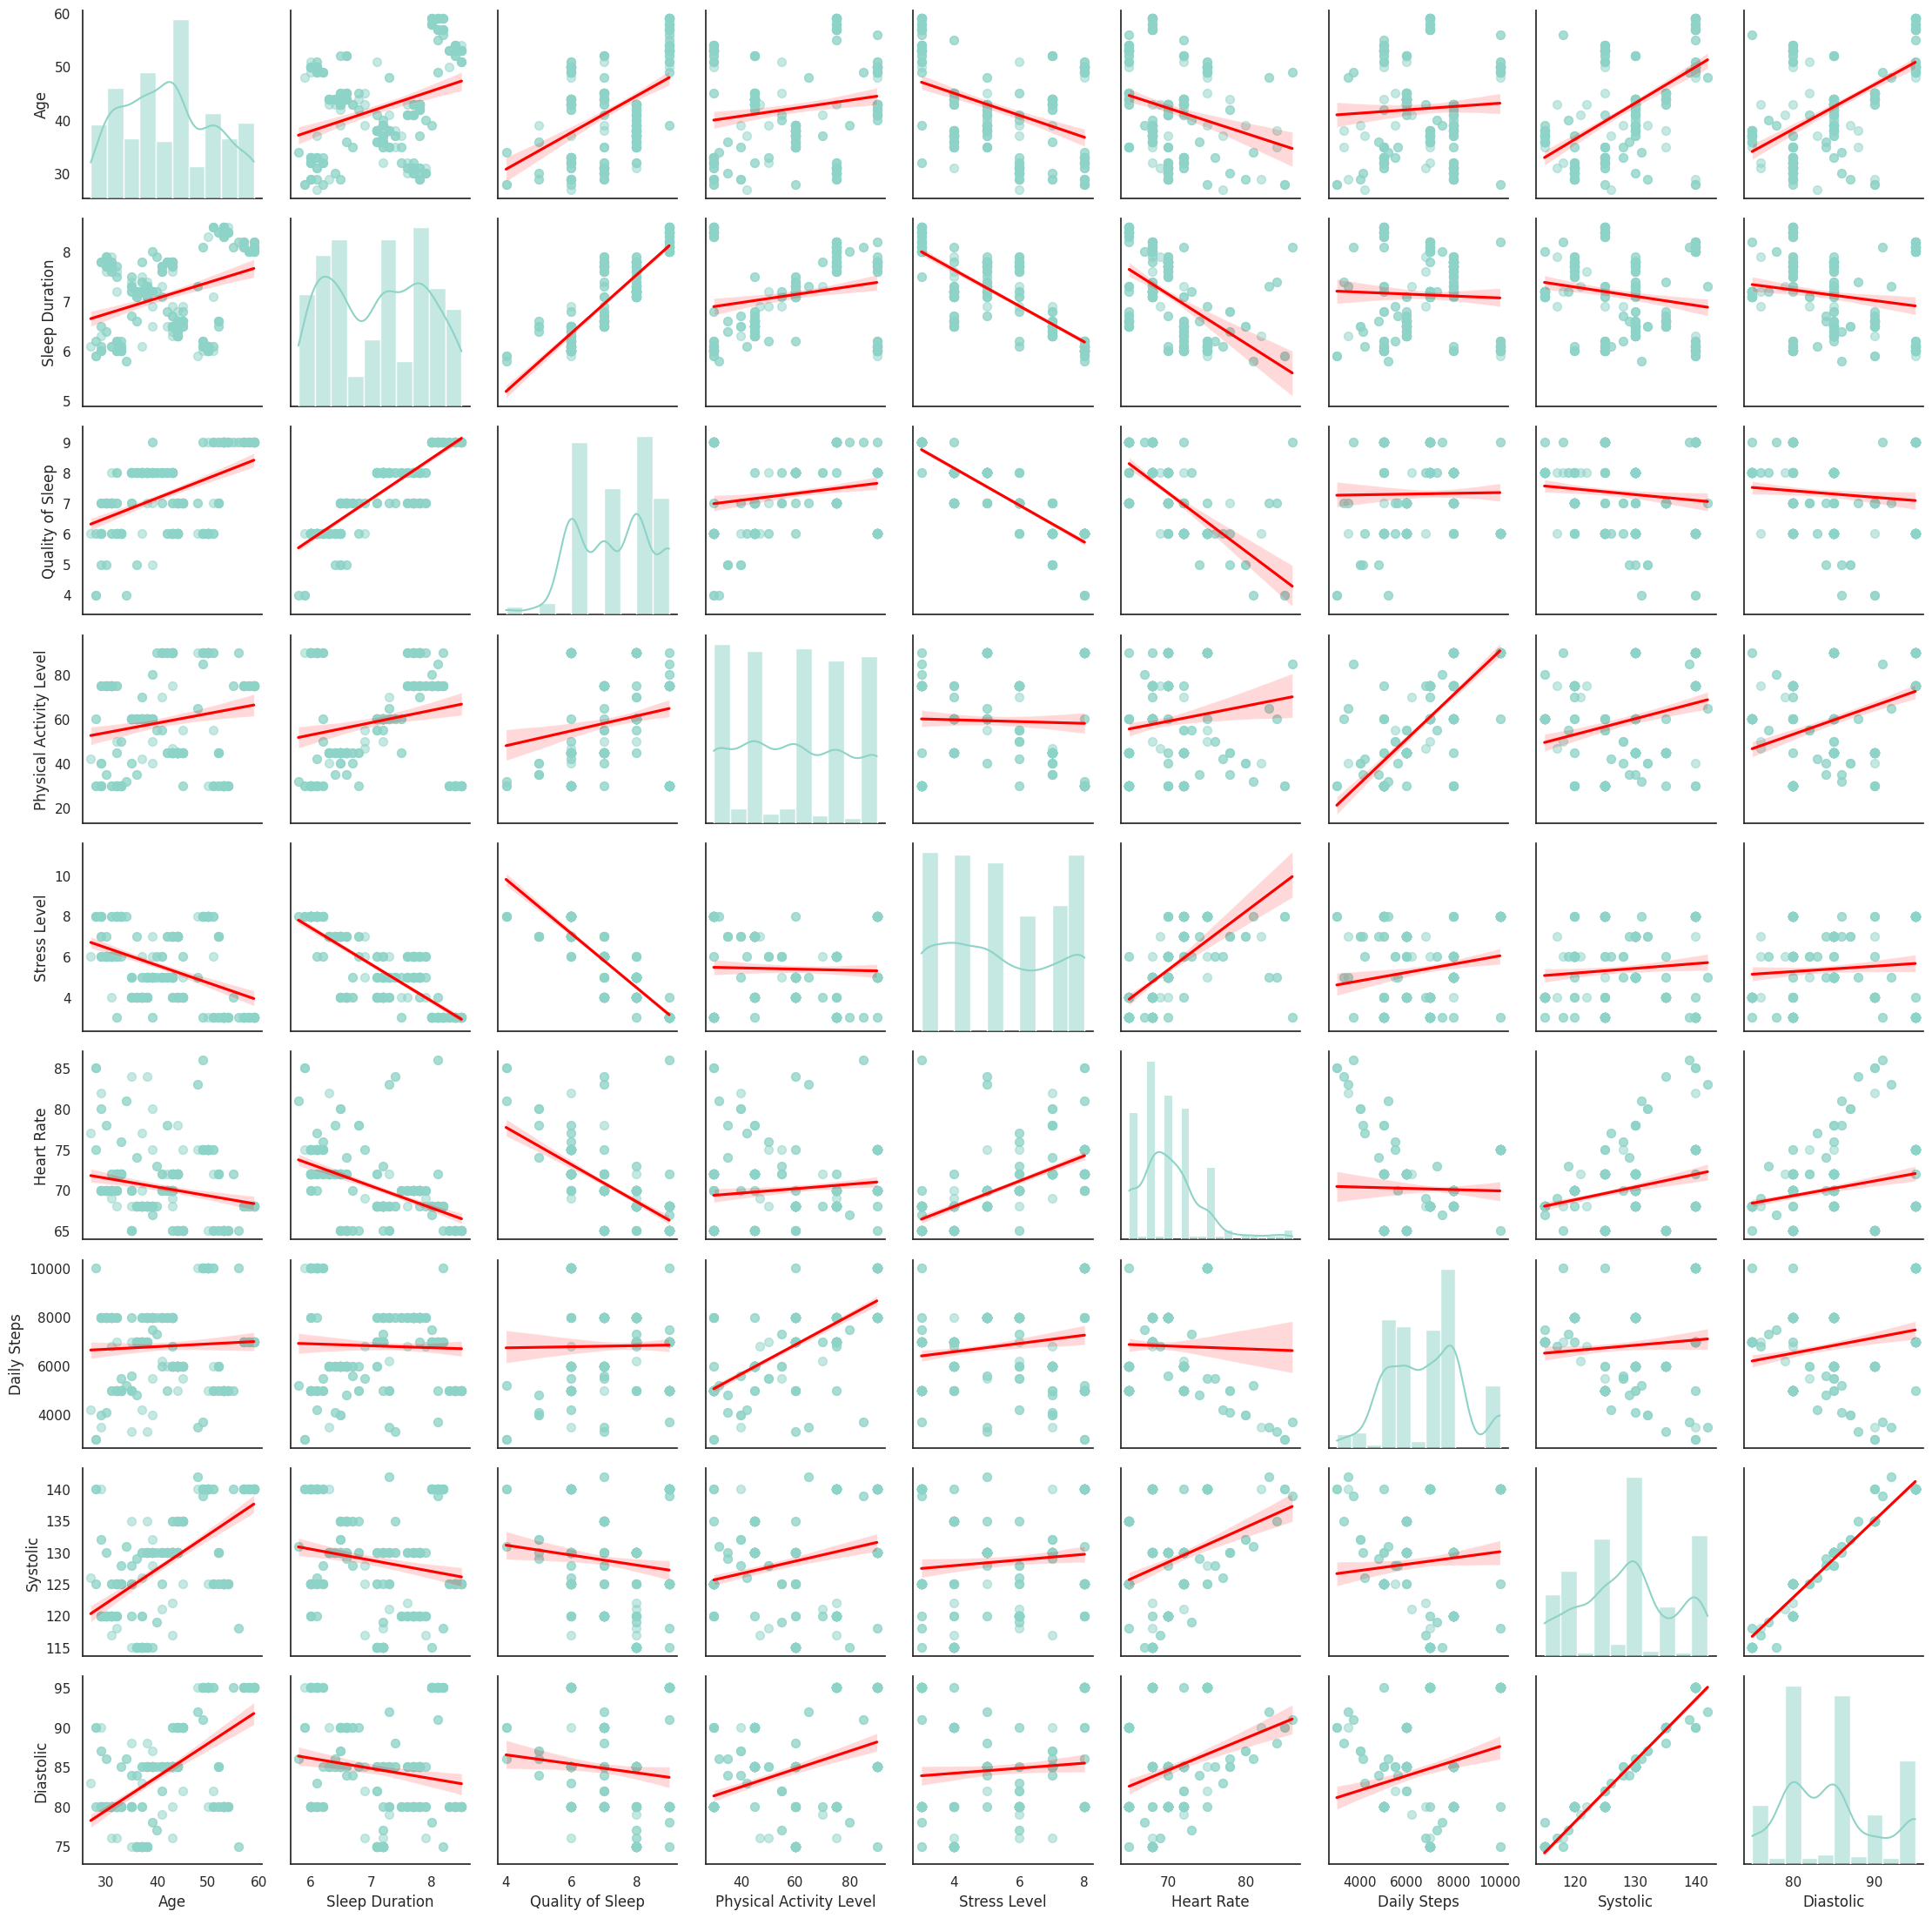

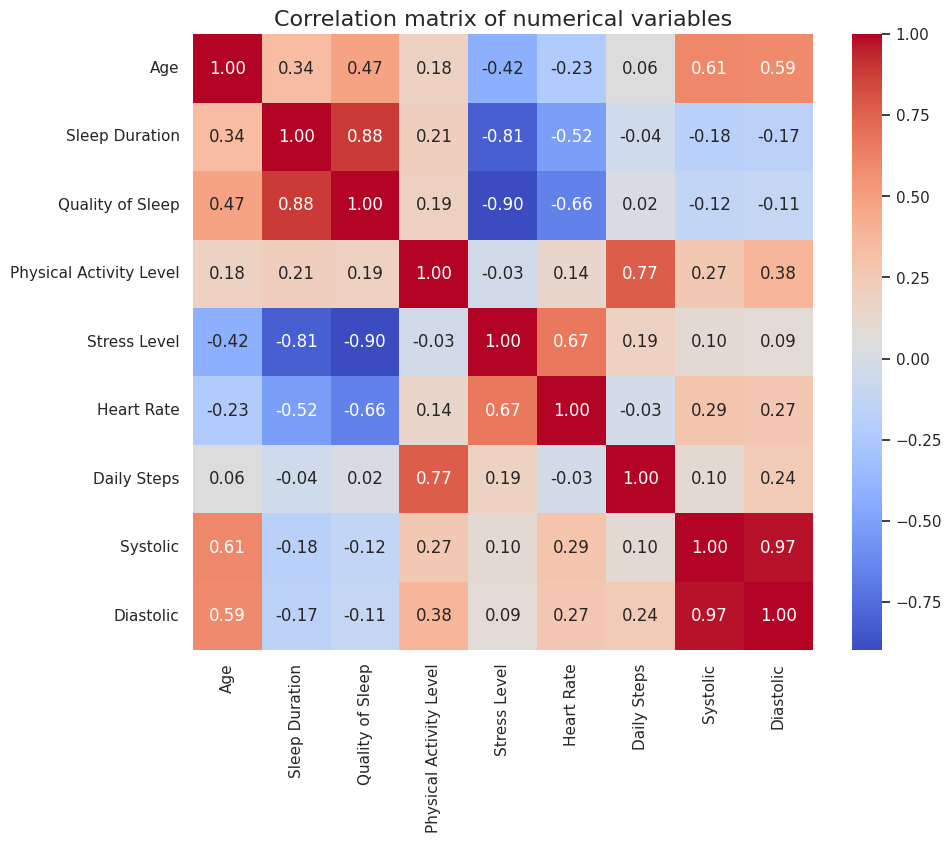

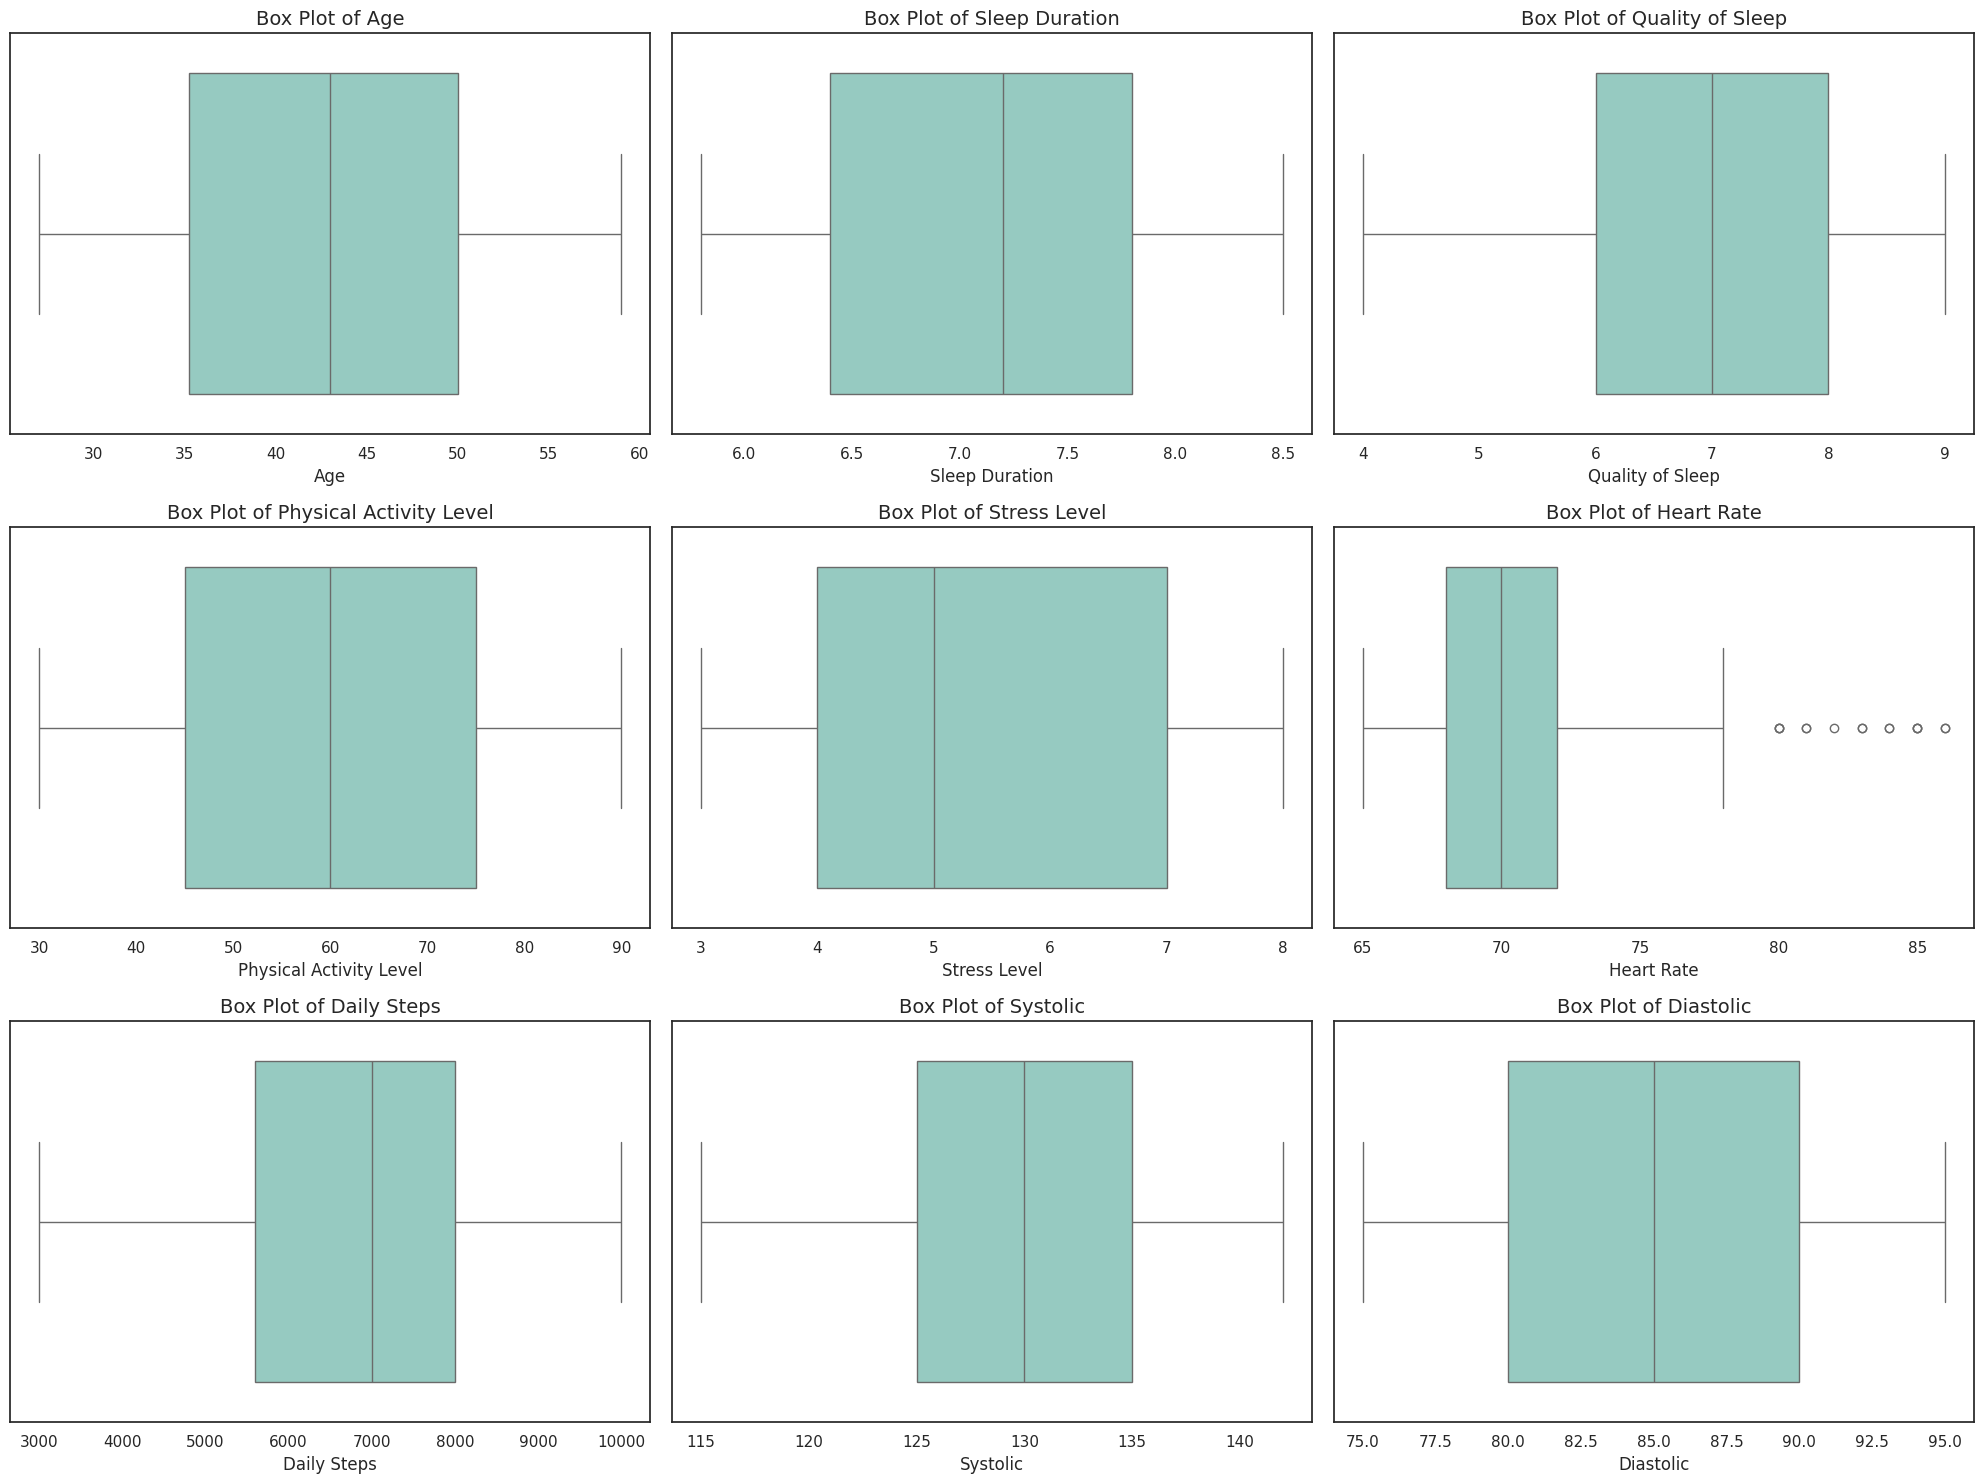

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set_palette(palette='Set3')


num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

pair_grid = sns.PairGrid(data=data[num_vars], diag_sharey=False)

pair_grid.map_diag(sns.histplot, kde=True)

pair_grid.map_offdiag(sns.regplot, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})


corr_matrix = data[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of numerical variables', fontsize=16)
plt.show()


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var}', fontsize=14)
    axes[row, col].set_xlabel(var, fontsize=12)

plt.tight_layout()
plt.show()

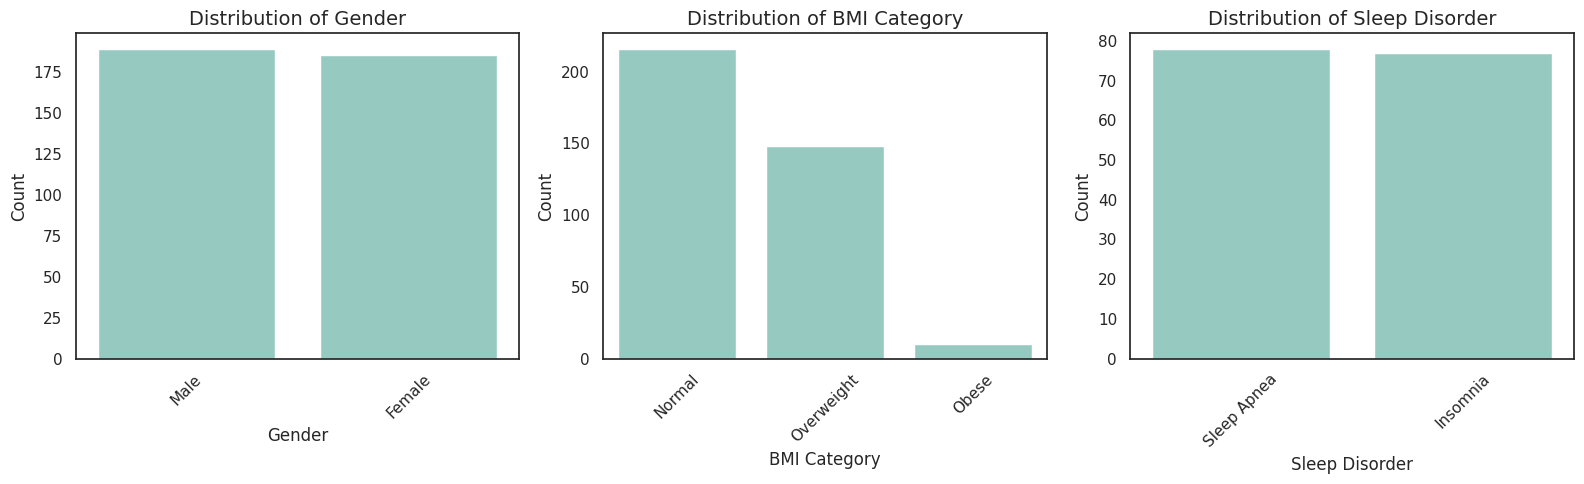

Available sleep disorder categories: Index(['Insomnia', 'Sleep Apnea'], dtype='object', name='Sleep Disorder')


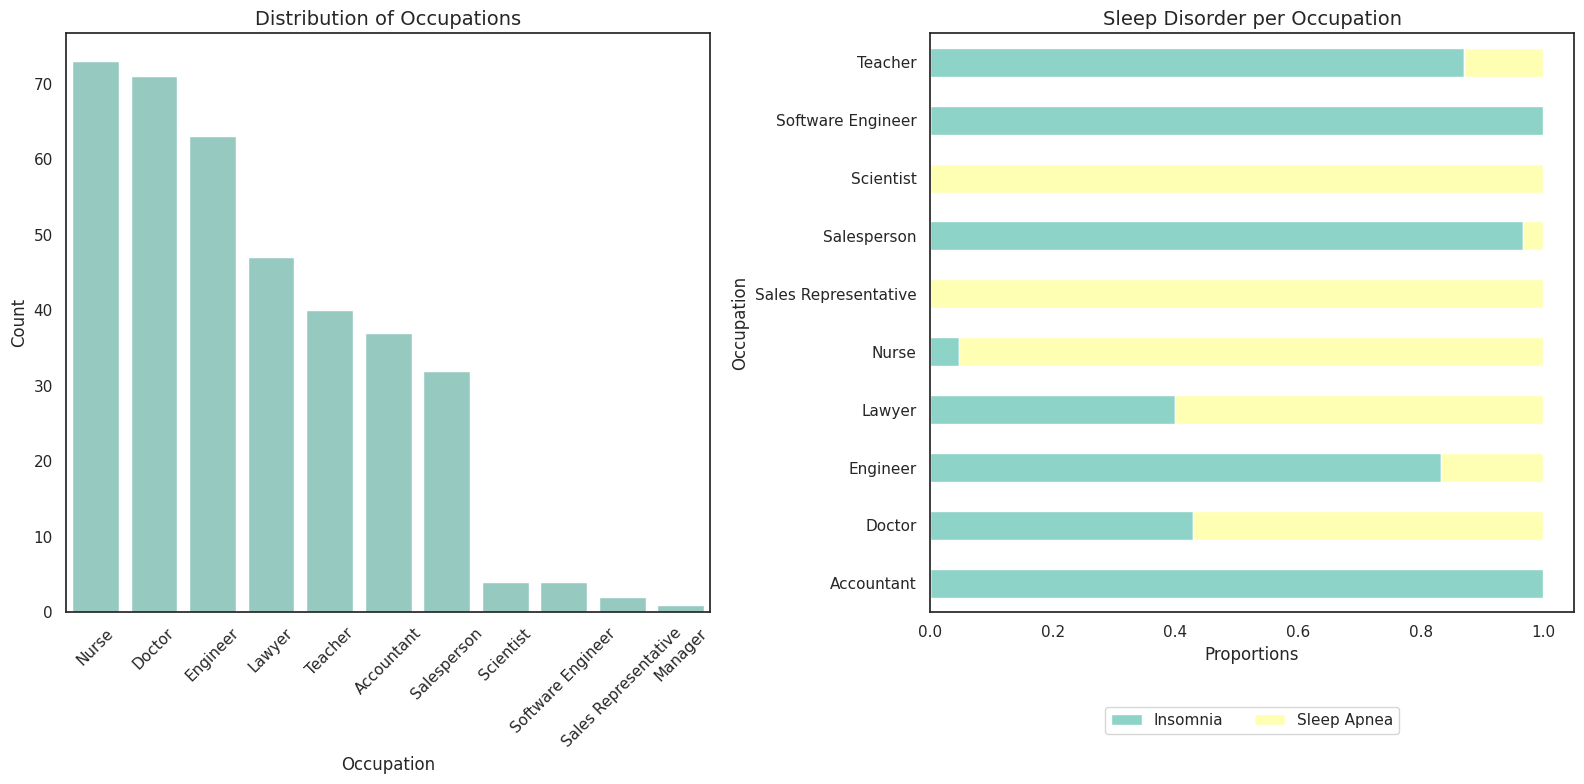

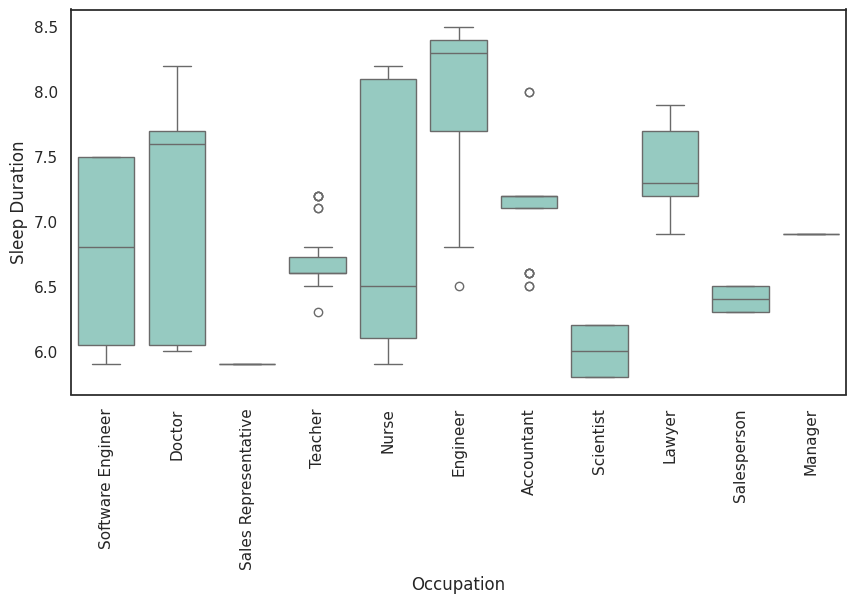

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for i, var in enumerate(['Gender', 'BMI Category', 'Sleep Disorder']):
    order = data[var].value_counts().index
    sns.countplot(x=var, data=data, ax=axes[i], order=order)
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

order = data['Occupation'].value_counts().index
sns.countplot(x='Occupation', data=data, ax=ax1, order=order)
ax1.set_title('Distribution of Occupations', fontsize=14)
ax1.set_xlabel('Occupation', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)


occup_dis = data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack().fillna(0)
print("Available sleep disorder categories:", occup_dis.columns)


order_sleep_disorder = occup_dis.columns.tolist()
occup_dis[order_sleep_disorder].plot(kind='barh', stacked=True, ax=ax2)

ax2.set_title('Sleep Disorder per Occupation', fontsize=14)
ax2.set_xlabel('Proportions', fontsize=12)
ax2.set_ylabel('Occupation', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y='Sleep Duration', x='Occupation')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']


label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

y_le = LabelEncoder()
y = y_le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


scaler = StandardScaler()
num_vars = X.select_dtypes(include=['number']).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Decision Tree Accuracy Score: {accuracy:.2f}")

Decision Tree Accuracy Score: 87.61


In [ ]:
print("Features used in the model:", X.columns.tolist())


Features used in the model: ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
            'Daily Steps', 'Systolic', 'Diastolic']

user_input = {}
for feature in features:
    value = input(f"Enter {feature}: ")
    if feature in label_encoders:
        value = label_encoders[feature].transform([value])[0]
    else:
        value = float(value)
    user_input[feature] = value

input_df = pd.DataFrame([user_input])
num_vars = input_df.select_dtypes(include=['number']).columns
input_df[num_vars] = scaler.transform(input_df[num_vars])

prediction = dt_model.predict(input_df)
predicted_class = y_le.inverse_transform(prediction)[0]
print(f"Predicted Sleep Disorder: {predicted_class}")

Enter Gender: Male
Enter Age: 55
Enter Occupation: Doctor
Enter Sleep Duration: 7
Enter Quality of Sleep: 7
Enter Physical Activity Level: 77
Enter Stress Level: 8
Enter BMI Category: Normal
Enter Heart Rate: 88
Enter Daily Steps: 10000
Enter Systolic: 120
Enter Diastolic: 80
Predicted Sleep Disorder: nan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

y_le = LabelEncoder()
y = y_le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
num_vars = X.select_dtypes(include=['number']).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100
print(f"Decision Tree Accuracy Score: {dt_accuracy:.2f}")


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred) * 100
print(f"Random Forest Accuracy Score: {rf_accuracy:.2f}")
# Combined Accuracy (Average)
combined_accuracy = (dt_accuracy + rf_accuracy) / 2
print(f"Combined Accuracy Score: {combined_accuracy:.2f}")

Decision Tree Accuracy Score: 87.61
Random Forest Accuracy Score: 92.04
Combined Accuracy Score: 89.82


In [ ]:
import numpy as np
import pandas as pd

features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
            'Daily Steps', 'Systolic', 'Diastolic']

user_input = {}
for feature in features:
    value = input(f"Enter {feature}: ")
    if feature in label_encoders:
        value = label_encoders[feature].transform([value])[0]
    else:
        value = float(value)
    user_input[feature] = value

input_df = pd.DataFrame([user_input])
num_vars = input_df.select_dtypes(include=['number']).columns
input_df[num_vars] = scaler.transform(input_df[num_vars])

dt_prediction = dt_model.predict(input_df)
dl_predicted_class = y_le.inverse_transform(dt_prediction)[0]
print(f"Decision Tree Predicted Sleep Disorder: {dl_predicted_class}")


rf_prediction = rf_model.predict(input_df)
rf_predicted_class = y_le.inverse_transform(rf_prediction)[0]
print(f"Random Forest Predicted Sleep Disorder: {rf_predicted_class}")


Enter Gender: Male
Enter Age: 55
Enter Occupation: Doctor
Enter Sleep Duration: 8
Enter Quality of Sleep: 8
Enter Physical Activity Level: 77
Enter Stress Level: 9
Enter BMI Category: Normal
Enter Heart Rate: 88
Enter Daily Steps: 10000
Enter Systolic: 120
Enter Diastolic: 80
Decision Tree Predicted Sleep Disorder: nan
Random Forest Predicted Sleep Disorder: nan


In [ ]:
data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Assuming data is already loaded
X = data.drop(['Sleep Disorder'], axis=1).copy()
y = data['Sleep Disorder']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
num_vars = X_train.select_dtypes(include=[np.number]).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100
print(f"Decision Tree Accuracy Score: {dt_accuracy:.2f}")

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
print(f"Logistic Regression Accuracy Score: {lr_accuracy:.2f}")


# Combined Accuracy (Average)
combined_accuracy = (dt_accuracy + lr_accuracy) / 2
print(f"Combined Accuracy Score: {combined_accuracy:.2f}")


Decision Tree Accuracy Score: 87.61
Logistic Regression Accuracy Score: 86.73
Combined Accuracy Score: 87.17


In [ ]:
import numpy as np
import pandas as pd

features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
            'Daily Steps', 'Systolic', 'Diastolic']

user_input = {}
for feature in features:
    value = input(f"Enter {feature}: ")
    if feature in label_encoders:
        value = label_encoders[feature].transform([value])[0]
    else:
        value = float(value)
    user_input[feature] = value


input_df = pd.DataFrame([user_input])
num_vars = input_df.select_dtypes(include=['number']).columns
input_df[num_vars] = scaler.transform(input_df[num_vars])


dt_probs = dt_model.predict_proba(input_df)
rf_probs = rf_model.predict_proba(input_df)


avg_probs = (dt_probs + rf_probs) / 2
final_pred = np.argmax(avg_probs, axis=1)[0]


dt_predicted_class = y_le.inverse_transform([np.argmax(dt_probs, axis=1)[0]])[0]
rf_predicted_class = y_le.inverse_transform([np.argmax(rf_probs, axis=1)[0]])[0]
final_predicted_class = y_le.inverse_transform([final_pred])[0]


print(f"Final Ensemble Predicted Sleep Disorder: {final_predicted_class}")


Enter Gender: Male
Enter Age: 12
Enter Occupation: Doctor
Enter Sleep Duration: 8
Enter Quality of Sleep: 8
Enter Physical Activity Level: 88
Enter Stress Level: 8
Enter BMI Category: Normal
Enter Heart Rate: 88
Enter Daily Steps: 120
Enter Systolic: 120
Enter Diastolic: 80
Final Ensemble Predicted Sleep Disorder: nan


In [ ]:
import joblib

# Save model, scaler, and encoders in a dictionary
model_package = {
    "model": dt_model,  # Decision Tree Model
    "scaler": scaler,    # Standard Scaler
    "encoders": label_encoders,  # Label Encoders
    "target_encoder": y_le  # Label Encoder for target variable
}

# Save as a single file
joblib.dump(model_package, "sleep_model.pkl")
print("Model, scaler, and encoders saved in sleep_model.pkl")


Model, scaler, and encoders saved in sleep_model.pkl


In [ ]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



X = data.drop(['Sleep Disorder'], axis=1).copy()
y = data['Sleep Disorder']


label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y_le = LabelEncoder()
y = y_le.fit_transform(y)

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


scaler = StandardScaler()
num_vars = X_train.select_dtypes(include=[np.number]).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

dt_model = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")


lr_model = LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")


xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred) * 100
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")


final_pred = np.round((dt_pred + lr_pred + xgb_pred) / 3)
final_accuracy = accuracy_score(y_test, final_pred) * 100
print(f"Final Ensemble Accuracy: {final_accuracy:.2f}%")


Decision Tree Accuracy: 86.87%
Logistic Regression Accuracy: 91.92%
XGBoost Accuracy: 93.43%
Final Ensemble Accuracy: 91.41%


In [ ]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




X = data.drop(['Sleep Disorder'], axis=1).copy()
y = data['Sleep Disorder']


label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y_le = LabelEncoder()
y = y_le.fit_transform(y)


smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


scaler = StandardScaler()
num_vars = X_train.select_dtypes(include=[np.number]).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

dt_model = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=2,
                                  class_weight="balanced", criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

lr_model = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=3000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")

xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=8,
                              subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred) * 100
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")


final_pred = np.round((0.2 * dt_pred + 0.3 * lr_pred + 0.5 * xgb_pred))
final_accuracy = accuracy_score(y_test, final_pred) * 100
print(f"Final Ensemble Accuracy: {final_accuracy:.2f}%")


Decision Tree Accuracy: 87.37%
Logistic Regression Accuracy: 90.40%
XGBoost Accuracy: 94.95%
Final Ensemble Accuracy: 92.93%


In [ ]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

X = data.drop(['Sleep Disorder'], axis=1).copy()
y = data['Sleep Disorder']

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


y_le = LabelEncoder()
y = y_le.fit_transform(y)


smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


scaler = StandardScaler()
num_vars = X_train.select_dtypes(include=[np.number]).columns
X_train.loc[:, num_vars] = scaler.fit_transform(X_train[num_vars])
X_test.loc[:, num_vars] = scaler.transform(X_test[num_vars])



dt_model = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=2,
                                  class_weight="balanced", criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")


lr_model = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=3000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")


xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=8,
                              subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred) * 100
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")

svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

# SVM + XGBoost
stacking_model = StackingClassifier(
    estimators=[
        ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)),
        ('xgb', xgb.XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=8,
                                  subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=3000, random_state=42)
)

stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred) * 100
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}%")


<ipython-input-29-8b291897533d>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.85561409  1.16875121 -0.85561409 -0.85561409  1.16875121 -0.85561409
  1.16875121  1.16875121  1.16875121 -0.85561409  1.16875121 -0.85561409
 -0.85561409 -0.85561409  1.16875121 -0.85561409 -0.85561409  1.16875121
 -0.85561409  1.16875121 -0.85561409  1.16875121  1.16875121  1.16875121
  1.16875121  1.16875121 -0.85561409  1.16875121 -0.85561409 -0.85561409
 -0.85561409 -0.85561409  1.16875121  1.16875121 -0.85561409  1.16875121
  1.16875121  1.16875121  1.16875121 -0.85561409  1.16875121 -0.85561409
  1.16875121 -0.85561409 -0.85561409 -0.85561409 -0.85561409  1.16875121
  1.16875121 -0.85561409 -0.85561409 -0.85561409  1.16875121  1.16875121
 -0.85561409  1.16875121  1.16875121 -0.85561409 -0.85561409 -0.85561409
 -0.85561409 -0.85561409  1.16875121 -0.85561409  1.16875121 -0.85561409
 -0.85561409 -0.85561409 -0.85561409 -0.855

Decision Tree Accuracy: 87.37%
Logistic Regression Accuracy: 90.40%
XGBoost Accuracy: 94.95%
SVM Accuracy: 91.92%
Stacking Classifier Accuracy: 93.43%


In [ ]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

X = data.drop(['Sleep Disorder'], axis=1).copy()
y = data['Sleep Disorder']

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

y_le = LabelEncoder()
y = y_le.fit_transform(y)

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
num_vars = X_train.select_dtypes(include=[np.number]).columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars].copy())
X_test[num_vars] = scaler.transform(X_test[num_vars].copy())

dt_model = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=2,
                                  class_weight="balanced", criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

lr_model = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=3000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")

xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=8,
                              subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred) * 100
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")

svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

stacking_model = StackingClassifier(
    estimators=[
        ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)),
        ('xgb', xgb.XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=8,
                                  subsample=0.8, colsample_bytree=0.8, gamma=0.1, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=3000, random_state=42)
)

stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred) * 100
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}%")

Decision Tree Accuracy: 87.37%
Logistic Regression Accuracy: 90.40%
XGBoost Accuracy: 94.95%
SVM Accuracy: 91.92%
Stacking Classifier Accuracy: 93.43%
